In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
markets = ['Oil', 'Russia', 'China', 'Korea', 'Brazil', 'Mexico', 'US' , 'Italy',  'France', 'German',  'Netherlands', 'UK']
#markets = ['Oil', 'Russia', 'China', 'Korea', 'Brazil', 'Mexico' , 'Italy',  'France', 'German',  'Netherlands', 'UK']
data_url = 'data/'

In [3]:
sigma_df = pd.DataFrame()
jump_df = pd.DataFrame()
jump_v_df = pd.DataFrame()
for market in tqdm(markets):
    df = pd.read_csv(r'F:/0.JumpTailwithDiffusionVolatility/' + data_url+market+'/result.csv', parse_dates=[0], index_col=0)
    df = df.loc[df.sigma>0]

    sigma_df = pd.concat([sigma_df, df.sigma], axis=1, join="outer")
    jump_df = pd.concat([jump_df, df.LV], axis=1, join="outer")
    jump_v_df = pd.concat([jump_v_df, df.LJV], axis=1, join="outer")


sigma_df.columns = markets
jump_df.columns = markets
jump_v_df.columns = markets

# IvyDB European数据不够
sigma_df  = sigma_df.loc[sigma_df.index<=pd.to_datetime('2021-9-30')]
jump_df   = jump_df.loc[jump_df.index<=pd.to_datetime('2021-9-30')]
jump_v_df = jump_v_df.loc[jump_v_df.index<=pd.to_datetime('2021-9-30')]
# IvyDB Russia数据缺失
sigma_df  = sigma_df.loc[sigma_df.index>=pd.to_datetime('2008-4-1')]
jump_df   = jump_df.loc[jump_df.index>=pd.to_datetime('2008-4-1')]
jump_v_df = jump_v_df.loc[jump_v_df.index>=pd.to_datetime('2008-4-1')]

100%|██████████| 12/12 [00:01<00:00,  8.56it/s]


In [4]:
sigma_df.fillna(method='ffill', inplace=True)
jump_df.fillna(method='ffill', inplace=True)
jump_v_df.fillna(method='ffill', inplace=True)
# sigma_df['weekday'] = pd.Series(sigma_df.index, index=sigma_df.index).dt.weekday+1
# sigma_df.loc[sigma_df.isnull().any(axis=1)]

In [5]:
sigma_df.to_csv('sigma_df.csv')
jump_df.to_csv('jump_df.csv')
jump_v_df.to_csv('jump_v_df.csv')

#提取板块期权的left jump和right jump

In [25]:
markets = ['GLD','Oil', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
data_url = 'data/'

In [26]:
ljump_df = pd.DataFrame()
ljump_v_df = pd.DataFrame()
rjump_df = pd.DataFrame()
rjump_v_df = pd.DataFrame()

In [27]:
for market in tqdm(markets):
    df = pd.read_csv(r'F:/0.JumpTailwithDiffusionVolatility/' + data_url+market+'/result_new.csv', parse_dates=[0], index_col=0)
    df = df.loc[df.sigma>0]

    ljump_df = pd.concat([ljump_df, df.LJVariance8], axis=1, join="outer")
    ljump_v_df = pd.concat([ljump_v_df, df.LJVolatility8], axis=1, join="outer")
    rjump_df = pd.concat([rjump_df, df.RJVariance8], axis=1, join="outer")
    rjump_v_df = pd.concat([rjump_v_df, df.RJVolatility8], axis=1, join="outer")

100%|██████████| 11/11 [00:01<00:00,  7.24it/s]


In [28]:
ljump_df.columns = markets
ljump_v_df.columns = markets
rjump_df.columns = markets
rjump_v_df.columns = markets

In [29]:
def change_name(df):
    df.rename(columns={'XLY':'Consumer Discretionary','XLP':'Consumer Staples','XLE':'Energy','XLF':'Financial','XLV':'Health','XLI':'Industrial','XLB':'Materials','XLRE':'Real Estate','XLK':'Technology','XLU':'Utilities','XLC':'Communication Services','GLD':'Gold'}, inplace=True)
    df = df.dropna()
    return df

ljump_df = change_name(ljump_df)
ljump_v_df = change_name(ljump_v_df)
rjump_df = change_name(rjump_df)
rjump_v_df = change_name(rjump_v_df)

In [30]:
jump_v_df = np.sqrt(ljump_df+rjump_v_df)

In [31]:
jump_v_df.to_csv('jump.csv')
ljump_v_df.to_csv('ljump.csv')
rjump_v_df.to_csv('rjump.csv')

In [15]:
ljump_df

,GLD,Oil,Materials,Energy,Financial,Industrial,Technology,Consumer Staples,Utilities,Health,Consumer Discretionary
2008-01-02,NaN,0.003717,0.009968,0.007639,0.014480,0.004125,0.007474,0.001402,0.003242,0.002655,0.007484
2008-01-03,NaN,0.003827,0.009222,0.007763,0.012272,0.006233,0.006684,0.001052,0.002387,0.002643,0.008562
2008-01-04,NaN,0.003798,0.008869,0.006918,0.012004,0.004680,0.006846,0.002617,0.003122,0.002413,0.007468
2008-01-07,NaN,0.004544,0.008345,0.008309,0.011431,0.004712,0.007612,0.002959,0.003433,0.001737,0.006682
2008-01-08,NaN,0.004160,0.008329,0.003801,0.011540,0.003544,0.008174,0.001234,0.003080,0.001448,0.006900
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.001058,0.036118,0.005209,0.009696,0.008911,0.005247,0.008501,0.002533,0.003856,0.002617,0.006880
2021-12-28,0.001201,0.023772,0.004719,0.010284,0.008380,0.005680,0.008786,0.002459,0.004603,0.004062,0.007468
2021-12-29,0.001443,0.025607,0.004757,0.008497,0.007177,0.004446,0.007851,0.002355,0.004192,0.003791,0.007036
2021-12-30,0.001291,0.022342,0.004072,0.008561,0.008080,0.005029,0.007549,0.002617,0.004396,0.003039,0.006704


TypeError: bad operand type for unary -: 'AxesSubplot'

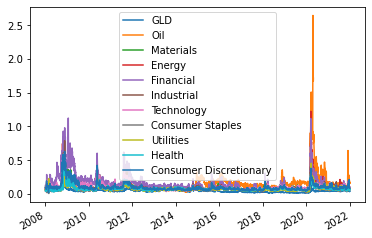

In [17]:
ljump_v_df.plot()

<AxesSubplot:>

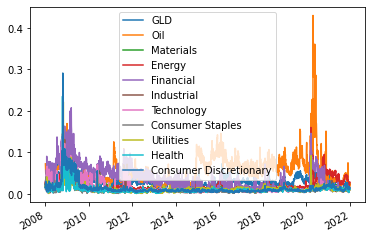

In [18]:
rjump_v_df.plot()

<AxesSubplot:>

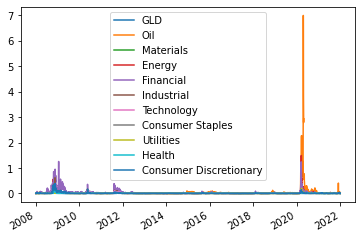

In [19]:
ljump_df.plot()

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

In [56]:
markets = list(jump_v_df.columns)
markets = [ 'Oil',
'Gold',
 'Materials',
 'Energy',
 'Financial',
 'Industrial',
 'Technology',
 'Consumer Staples',
 'Utilities',
 'Health',
 'Consumer Discretionary']

C:\Users\12966\AppData\Local\Temp/ipykernel_16688/3844494072.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('RiskMeasure.pdf',dpi=600, bbox_inches='tight',papertype='a4')


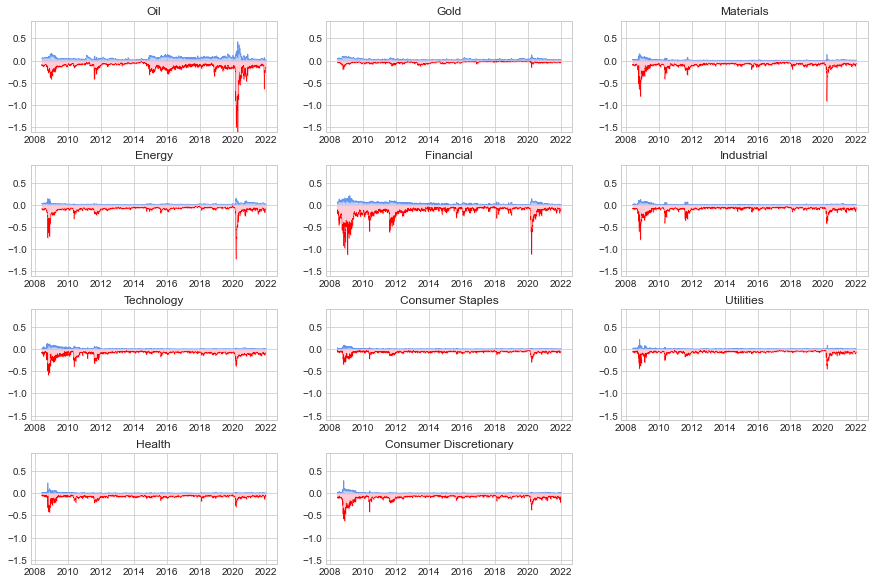

In [57]:
fig,axes=plt.subplots(4,3,figsize=(15,10),sharex=False,sharey=False)#sharex,sharey表示是否公用坐标轴
n = 0
for market in markets:
    i,j = divmod(n,3)
    # data = sectorleveldata[market]
    axes[i,j].fill_between(rjump_v_df.index, rjump_v_df[market],linewidth=1,color='cornflowerblue',alpha=0.4)
    axes[i,j].fill_between(ljump_v_df.index, -ljump_v_df[market],linewidth=1,color='pink',alpha=0.8)
    axes[i,j].plot(rjump_v_df.index, rjump_v_df[market],linewidth=0.5, color='cornflowerblue')
    axes[i,j].plot(ljump_v_df.index, -ljump_v_df[market],linewidth=0.5,color='red')
    # axes[i,j].plot(data.index, data['95%VaR'],linewidth=0.2,color='red')
    # axes[i,j].plot(data.index, data['90%VaR'],linewidth=0.2,color='lightcoral')
    axes[i,j].set_title(market,fontsize='large')
    if i<3:
        axes[i,j].set_ylim(-1.6,0.9)
    else:
        axes[i,j].set_ylim(-1.6,0.9)
    n+=1
fig.delaxes(axes[3][2])
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.savefig('RiskMeasure.pdf',dpi=600, bbox_inches='tight',papertype='a4')